In [1]:
%run rs2th_functions.ipynb

In [2]:
dr=0.02;

In [3]:
niter = 5;

In [4]:
# RVCH 
ft = np.array([1,  10, 20,  100.0]);  # frequency table
rt = np.array([1,  15, 15,  3]);  # response spectrum table

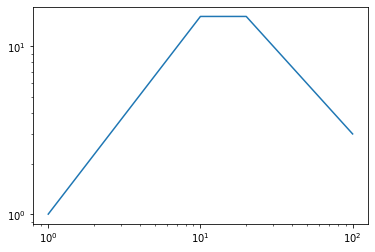

In [5]:
plt.loglog(ft,rt);

In [6]:
tmax = 39.72; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)

In [7]:
## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);

In [8]:
## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

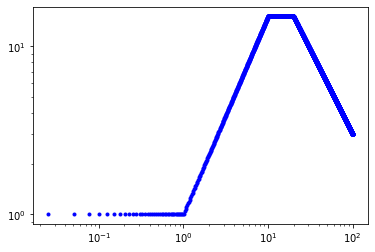

In [9]:
plt.loglog(freq,rs,'b.');

In [10]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,dr,dt);

In [11]:
for k in range(niter):
    An = rs/rs_syn;
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    th[np.where(np.abs(th)==max(np.abs(th)))] /= 2;
    freq,rs_syn = srs_iso(freq,th,dr,dt);

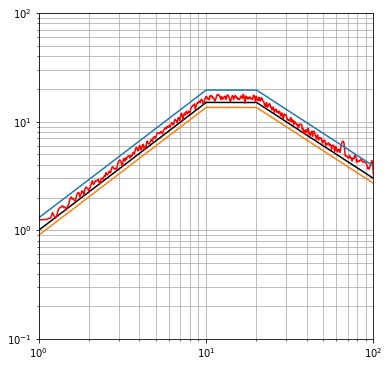

In [12]:
th *= 1.1;
freq,rs_syn = srs_iso(freq,th,dr,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

In [13]:
fileO(freq,rs_syn,'rs_syn_fft1.txt');

In [14]:
fileO(t,th.real,'th_syn_fft1.txt');

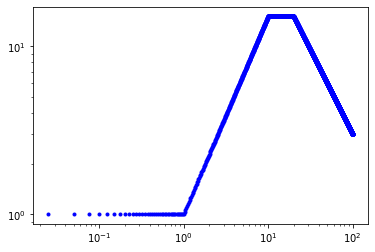

In [15]:
tmax = 40; fmax=100;
dt = 1/(2*fmax); t = np.arange(0,tmax+dt,dt)

## frequency table 작성
Nt = len(t); df = fmax/(Nt//2);
freq = np.arange(df, fmax+df, df);

## log-log interpolation
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

plt.loglog(freq,rs,'b.');

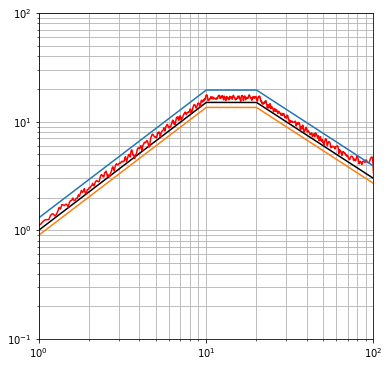

In [16]:
th = np.random.random(len(t));
An = np.zeros(len(rs));
freq,rs_syn = srs_iso(freq,th,dr,dt);

for k in range(niter):
    An = rs/rs_syn;
    ft_th = np.fft.fft(th);
    ft_th[:Nt//2] *= An
    ft_th[-(Nt//2):] *= np.flip(An);
    th = np.fft.ifft(ft_th)
    th[np.where(np.abs(th)==max(np.abs(th)))] /= 2;
    freq,rs_syn = srs_iso(freq,th,dr,dt);

th *= 1.1;
freq,rs_syn = srs_iso(freq,th,dr,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

In [17]:
fileO(freq,rs_syn,'rs_syn_fft2.txt');

In [18]:
fileO(t,th.real,'th_syn_fft2.txt');